## <span style="color:blue"> Ex 9 - Stefano Schmidt </span>

All the relevant code used is declared in **GA_helpers.h** and implemented in **GA_helpers.cpp** both in folder /GA_helper.<br>
The basic element of the code is the class `individual_type`. The class represents the gene of an individual, i.e. the ordered sequence of cities that shall be visited by the salesamen. In order to achieve this the class public inherits from `std::vector<int>`. The class owns a member with a destination list (i.e. `std::vector<std::vector<double>>`) holding the coordinates of all the target cities. <br>
The class is equipped for generating a random mutation, computing the fitness and the lenght of the path done with the order specified by the genes. It has as well some methods to print the sequence of its genes and the sequence of the coordinates of the cities to be visited.<br>
There is a number of mutation that are implemented in `individual_type::perform_mutation()`; at each call of the method one of them is chosen randomly and it's performed. The avaible mutations are:
- random swap: two genes chosen at random are swap
- random swap between neighbours: two neighbours are swap
- permutations between cities: two sequences of cities are swapped mantaining the order

In **GA_helpers.h** are defined also two functions for generating an `individual_type` from a couple of "parents". <br>
The class can compute the path of a lenght $l_i$ with method `path_lenght()` and the individual fitness $f_i$ defined by $f_i=(c-l_i)^4$. Here $c$ is a constant chosen such that is longer than any possible path lenght (to make fitness a increasing function of $l_i$).<br>
The algorith then proceeds with the following four steps:
1. Initializing population at random: M individuals are generated and given random genes
2. Do some mutations: a certain nuber of individual are extracted (Poisson distribution for deciding how many) and are exposed to a mutation
3. Creating next generations: according to their fitness, M couples of individuals are chosen to generate a children
4. New generation takes control: the parents are substituted by their children in the population. The best individual of the previous population is always replicated in the new generation

### Exercise 9.1
The algorithm described above is implemented in file **ex_9.cpp**. It produces a file **distances.dat** holding the path lenght computed for the best individual and for the average among the best half of individuals as a function of the number of generations. Furthermore every 25 generations it saves to folder **paths/** the current best path. At the end of the algorithm it produces the file **best_path.dat** with the best path that was ever found by the algorithm.<br>
In the following it has been chosen a population with $M=200$ individuals and $N_{gen} = 5000$ generations.<br>
The plots have been done with 30 cities randomly spread in a circle and in a box. The file distances.dat plotted below refers to a box configuration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

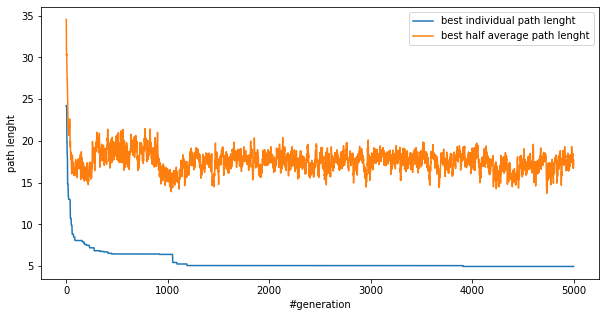

In [2]:
#learning rate of box
distances = np.loadtxt("try_distances.dat", dtype=float)

plt.figure(figsize=(10,5))
plt.plot(distances[:,0], distances[:,1],label="best individual path lenght")
plt.plot(distances[:,0], distances[:,2],label="best half average path lenght")
plt.xlabel("#generation",fontsize=10)
plt.ylabel("path lenght",fontsize=10)
plt.legend()
plt.show()

It is worth to be noticed that there is very few improvement over time for the best half average: the genetic algorith is ineffective at spreading a good mutation to all the population. However some small mutation can happen and the best individual have some improvments until around the 1200th generation: to be exposed to a favourable mutation after that is a very unlikely event.

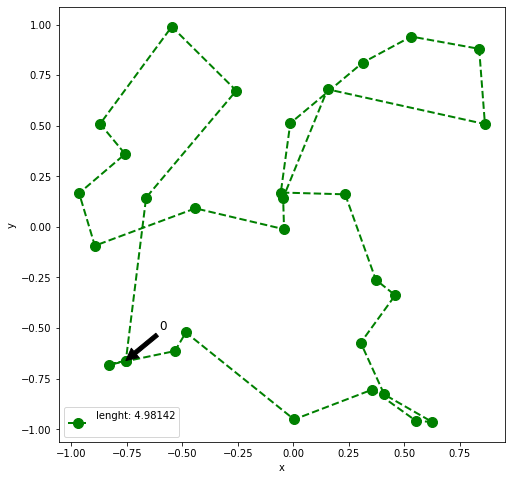

In [3]:
#best path box
file = "best_path_box.dat"
best_path = np.loadtxt(file, dtype=float,skiprows=1)
with open(file) as f:
    best_path_lenght = f.readline()

plt.figure(figsize=(8,8))
plt.plot(best_path[:,0], best_path[:,1],'go--', label=best_path_lenght,  linewidth=2, markersize=10)
plt.annotate("0",(best_path[0,0],best_path[0,1]), xytext = (best_path[0,0]+.15,best_path[0,1]+.15), arrowprops=dict(facecolor='black', shrink=0.0001),fontsize=12)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

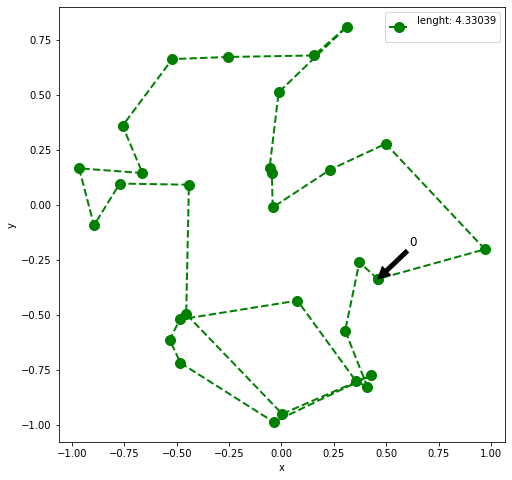

In [4]:
#best path circle
file = "best_path_circle.dat"
best_path = np.loadtxt(file, dtype=float,skiprows=1)
with open(file) as f:
    best_path_lenght = f.readline()

plt.figure(figsize=(8,8))
plt.plot(best_path[:,0], best_path[:,1],'go--', label=best_path_lenght,  linewidth=2, markersize=10)
plt.annotate("0",(best_path[0,0],best_path[0,1]), xytext = (best_path[0,0]+.15,best_path[0,1]+.15), arrowprops=dict(facecolor='black', shrink=0.0001),fontsize=12)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

It might be interestring to plot and compare the best paths from different generations (box case).

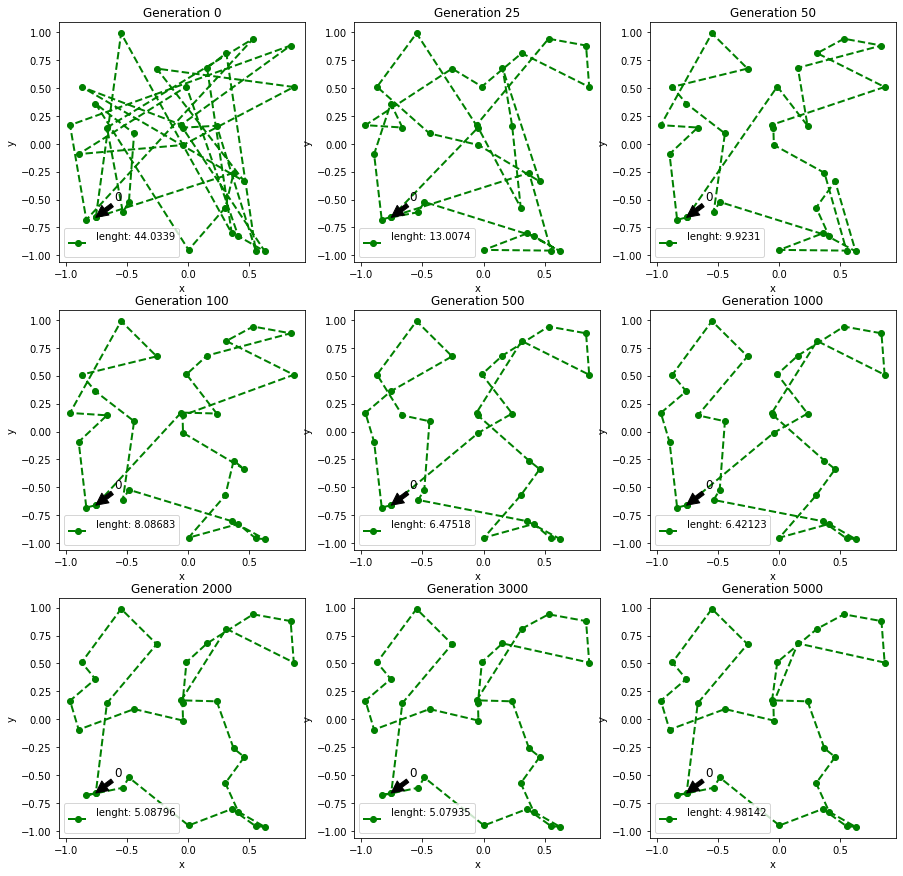

In [5]:
generations = [0,25,50,100, 500, 1000, 2000, 3000, 5000]
count = 1
plt.figure(figsize=(15,15))

for gen in generations:
    file = "./paths/"+str(gen)+".dat"
    best_path = np.loadtxt(file, dtype=float,skiprows=1)
    with open(file) as f:
        best_path_lenght = f.readline()

    plt.subplot(3,3,count)
    plt.title("Generation "+str(gen))
    plt.plot(best_path[:,0], best_path[:,1],'go--', label=best_path_lenght,  linewidth=2, markersize=6)
    plt.annotate("0",(best_path[0,0],best_path[0,1]), xytext = (best_path[0,0]+.15,best_path[0,1]+.15), arrowprops=dict(facecolor='black', shrink=0.0001),fontsize=12)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    count = count+1
plt.show()